## Impact of Work-from-Home (WFH) on Employee Productivity

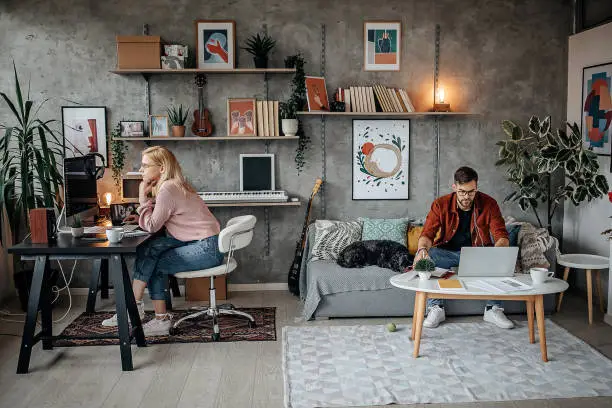

### 1. Defining the Problem:
__Goal:__ To analyze the impact of Work-from-Home (WFH) on employee productivity.

__Problem Statement:__
In the wake of the COVID-19 pandemic, many organizations have shifted to remote work environments. While this has provided flexibility, there are concerns about how Work From Home (WFH) might affect employee productivity. Understanding the impact of WFH on productivity can help organizations make informed decisions about remote work policies, employee management, and resource allocation.

#### Key Questions:
1. How does working from home affect employee productivity?
   * __Hypothesis:__ Employees who work from home have higher productivity scores compared to those who do not.
   

2. Are there gender differences in how WFH affects productivity?

   * __Hypothesis:__ Female employees might experience different productivity outcomes compared to male employees due to various factors (e.g., work-life balance, household responsibilities).
   
3. What is the relationship between the duration of WFH and changes in productivity?

    * __Hypothesis:__ Longer WFH durations are associated with higher improvements in productivity.
   
    
4. Are there any differences in the impact of WFH on productivity across different departments?

   * __Hypothesis:__ The impact of WFH on productivity varies between departments (e.g., IT vs. Sales).
   
5. Does employee age influence the effect of WFH on productivity?

   * __Hypothesis:__ Younger employees may adapt better to WFH, leading to greater productivity gains.
   
   
   
   
#### Objectives:

1. Compare pre-WFH and post-WFH productivity scores to determine if WFH has a statistically significant impact on productivity.


2. Analyze the correlation between WFH duration and productivity change to understand if longer periods of remote work lead to better or worse productivity outcomes.


3. Examine departmental differences in productivity changes to identify which departments benefit or suffer most from WFH.


4. Investigate the influence of employee demographics (age, experience, gender) on the relationship between WFH and productivity.


#### Expected Outcomes:

1. Clear insights into whether WFH improves or hinders productivity.
2. Understanding of how different employee demographics and job roles are affected by WFH.
3. Evidence-based recommendations for organizations considering WFH as a long-term policy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\projects\Python\employee_productivity_wfh.csv')

In [3]:
df.head()

,Employee_ID,Department,WFH_Status,Pre_WFH_Productivity,Post_WFH_Productivity,WFH_Duration,Experience,Age,Gender
0,1,Sales,No,71.8,64.4,0,7,57,Male
1,2,Marketing,Yes,56.6,61.2,1,13,48,Male
2,3,HR,Yes,73.8,71.3,2,24,55,Male
3,4,Sales,Yes,76.1,84.9,7,2,46,Female
4,5,Sales,Yes,75.6,81.0,10,4,49,Female


## Data Analysis Process

### 1. Data Cleaning

Approach:
For this data cleaning process, we will follow the following steps:


__1. Initial Summary:__ A quick summary of the data, including the count of non-null values for each column.

__2. Missing Values:__ The code checks for missing values and drops rows with any missing values.

__3. Duplicates:__ Identifies and reports any duplicate rows.

__4. Inconsistencies:__ Ensures that the 'Experience' column has values less than or equal to 'Age', and filters out any inconsistent rows.

__5. Outliers:__ Checks for outliers in the Pre_WFH_Productivity and Post_WFH_Productivity columns. Since the data was generated with limits, this should not produce any outliers.

__6. Final Summary:__ Provides a summary of the cleaned data and saves it to a new CSV file.

In [4]:
# Display the initial summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Department             1000 non-null   object 
 2   WFH_Status             1000 non-null   object 
 3   Pre_WFH_Productivity   1000 non-null   float64
 4   Post_WFH_Productivity  1000 non-null   float64
 5   WFH_Duration           1000 non-null   int64  
 6   Experience             1000 non-null   int64  
 7   Age                    1000 non-null   int64  
 8   Gender                 1000 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Employee_ID              0
Department               0
WFH_Status               0
Pre_WFH_Productivity     0
Post_WFH_Productivity    0
WFH_Duration             0
Experience               0
Age                      0
Gender                   0
dtype: int64


In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [7]:
#Check for inconsistencies in numeric columns
# For instance, 'Experience' shouldn't be greater than 'Age'

inconsistent_experience = df[df['Experience'] > df['Age']]
print(f"\nRows with 'Experience' greater than 'Age':\n{inconsistent_experience}")


Rows with 'Experience' greater than 'Age':
     Employee_ID Department WFH_Status  Pre_WFH_Productivity  \
7              8         HR        Yes                  74.6   
23            24  Marketing         No                  65.4   
114          115      Sales        Yes                  83.8   
152          153         HR         No                  55.5   
211          212      Sales         No                  49.6   
216          217  Marketing         No                  88.0   
218          219  Marketing        Yes                  64.3   
219          220      Sales        Yes                  75.7   
269          270      Sales         No                  83.8   
283          284      Sales        Yes                  52.6   
342          343      Sales        Yes                  76.4   
350          351  Marketing         No                  73.2   
379          380         HR         No                  66.8   
400          401  Marketing        Yes                  71.8

In [8]:
print(len(inconsistent_experience))

47


In [9]:
# Since inconsistencies are found, we could:
# - Adjust 'Experience' to a value less than 'Age'
# - Or drop these inconsistent rows we will drop it in our analysis

df = df[df['Experience'] <= df['Age']]

In [10]:
# Check for outliers in productivity scores
# Since valid productivity scores are between 30 and 100, which was already enforced during generation this should return empty results.
outliers_pre = df[(df['Pre_WFH_Productivity'] < 30) | (df['Pre_WFH_Productivity'] > 100)]
outliers_post = df[(df['Post_WFH_Productivity'] < 30) | (df['Post_WFH_Productivity'] > 100)]
print(f"\nOutliers in 'Pre_WFH_Productivity':\n{outliers_pre}")
print(f"\nOutliers in 'Post_WFH_Productivity':\n{outliers_post}")


Outliers in 'Pre_WFH_Productivity':
Empty DataFrame
Columns: [Employee_ID, Department, WFH_Status, Pre_WFH_Productivity, Post_WFH_Productivity, WFH_Duration, Experience, Age, Gender]
Index: []

Outliers in 'Post_WFH_Productivity':
Empty DataFrame
Columns: [Employee_ID, Department, WFH_Status, Pre_WFH_Productivity, Post_WFH_Productivity, WFH_Duration, Experience, Age, Gender]
Index: []


In [12]:
# Final summary after cleaning
print("\nFinal Summary After Cleaning:")
df.info()
df.describe()


Final Summary After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            953 non-null    int64  
 1   Department             953 non-null    object 
 2   WFH_Status             953 non-null    object 
 3   Pre_WFH_Productivity   953 non-null    float64
 4   Post_WFH_Productivity  953 non-null    float64
 5   WFH_Duration           953 non-null    int64  
 6   Experience             953 non-null    int64  
 7   Age                    953 non-null    int64  
 8   Gender                 953 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 74.5+ KB


,Employee_ID,Pre_WFH_Productivity,Post_WFH_Productivity,WFH_Duration,Experience,Age
count,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,496.86149,70.950262,72.181847,3.367261,14.565582,40.802728
std,288.51271,9.864333,11.714579,4.068409,8.589626,11.561350
min,1.00000,40.800000,37.100000,0.000000,1.000000,19.000000
25%,247.00000,64.300000,64.200000,0.000000,7.000000,31.000000
50%,497.00000,70.800000,72.100000,1.000000,14.000000,41.000000
75%,745.00000,77.300000,79.900000,7.000000,22.000000,51.000000
max,1000.00000,100.000000,100.000000,12.000000,30.000000,60.000000


In [13]:
# Optionally, save the cleaned dataset

df.to_csv('employee_productivity_wfh_cleaned.csv', index=False)

### 2. Exploratory Data Analysis (EDA)

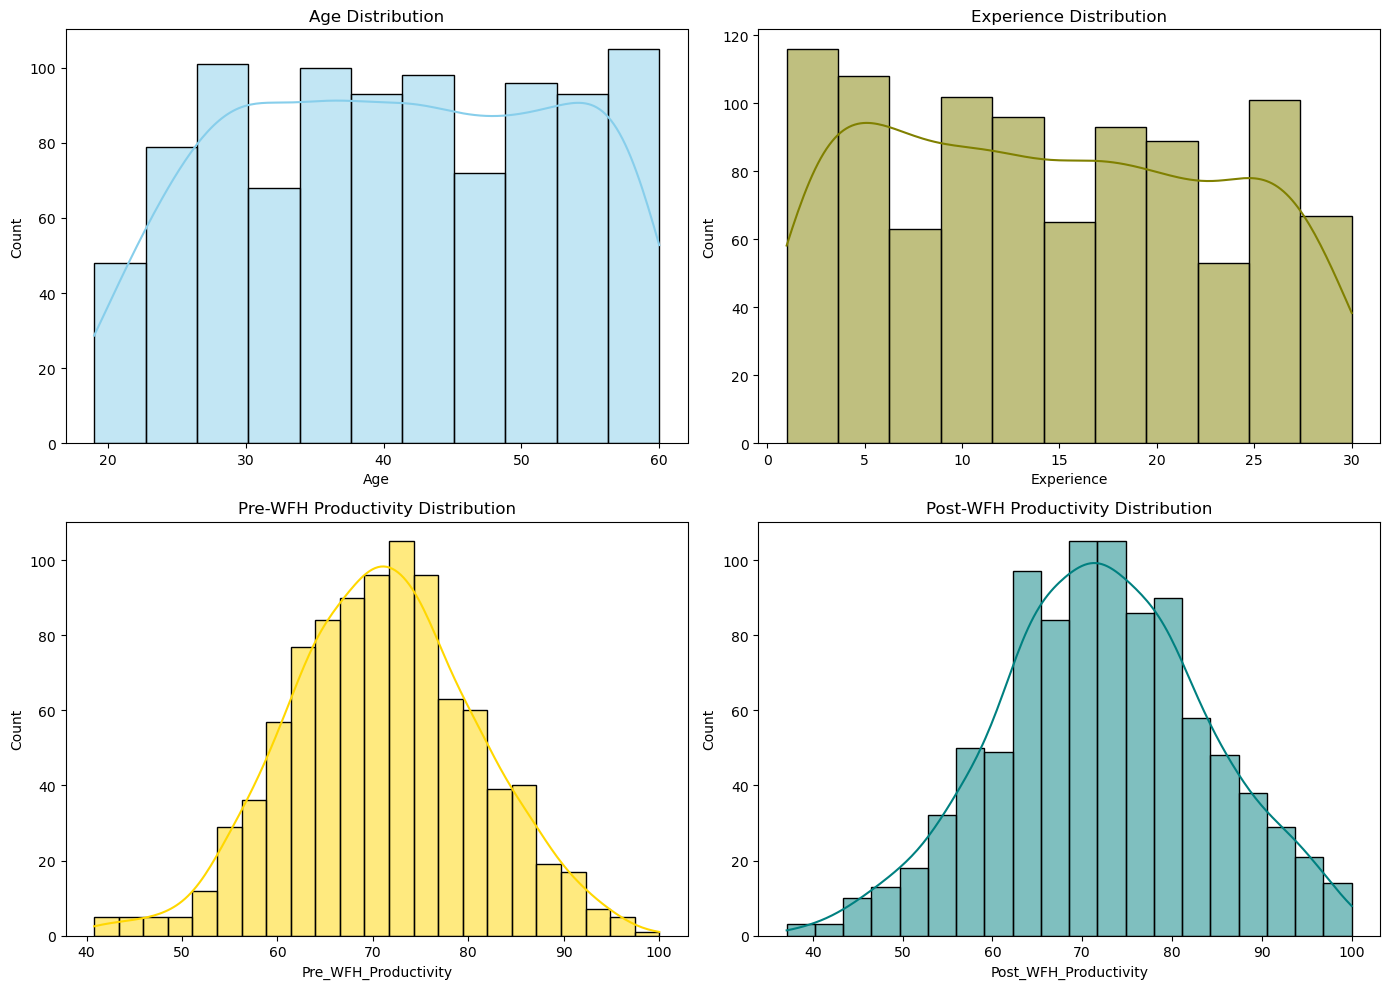

In [14]:
# Distribution of Numerical Variables

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['Age'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Age Distribution')
sns.histplot(df['Experience'], kde=True, ax=axs[0, 1], color='olive')
axs[0, 1].set_title('Experience Distribution')
sns.histplot(df['Pre_WFH_Productivity'], kde=True, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('Pre-WFH Productivity Distribution')
sns.histplot(df['Post_WFH_Productivity'], kde=True, ax=axs[1, 1], color='teal')
axs[1, 1].set_title('Post-WFH Productivity Distribution')
plt.tight_layout()
plt.show()

From the chart above:

__Age Distribution:__ The age distribution appears relatively uniform across different age groups. This suggests that the dataset covers a wide range of ages, providing a balanced view of how WFH impacts employees of different ages.

__Experience Distribution:__ The distribution of experience levels shows a higher count of employees with less than 5 years of experience. There’s a noticeable drop in the middle experience levels (10-20 years) before it picks up again for more senior employees. This could be indicative of a workforce that is either relatively new or quite experienced, with fewer mid-career employees.

This variety in age and experience is essential for analyzing the influence of these demographics on WFH productivity. It will allow us to examine if certain age groups or experience levels adapt better to WFH.


__Pre-WFH Productivity Distribution:__ The distribution appears to be roughly normal, with a slight skew to the right. Most employees have productivity scores centered around 70-80, with fewer employees in the extreme ends.

__Post-WFH Productivity Distribution:__ Similar to the pre-WFH distribution but appears slightly more spread out, but it might be slightly shifted to the right, indicating a potential increase in overall productivity. However, this needs to be confirmed with statistical tests.

Comparing these distributions helps in assessing whether WFH has led to a significant shift in productivity levels. A visual comparison suggests there might be some changes, which could be further analyzed using statistical tests to confirm if these changes are significant.

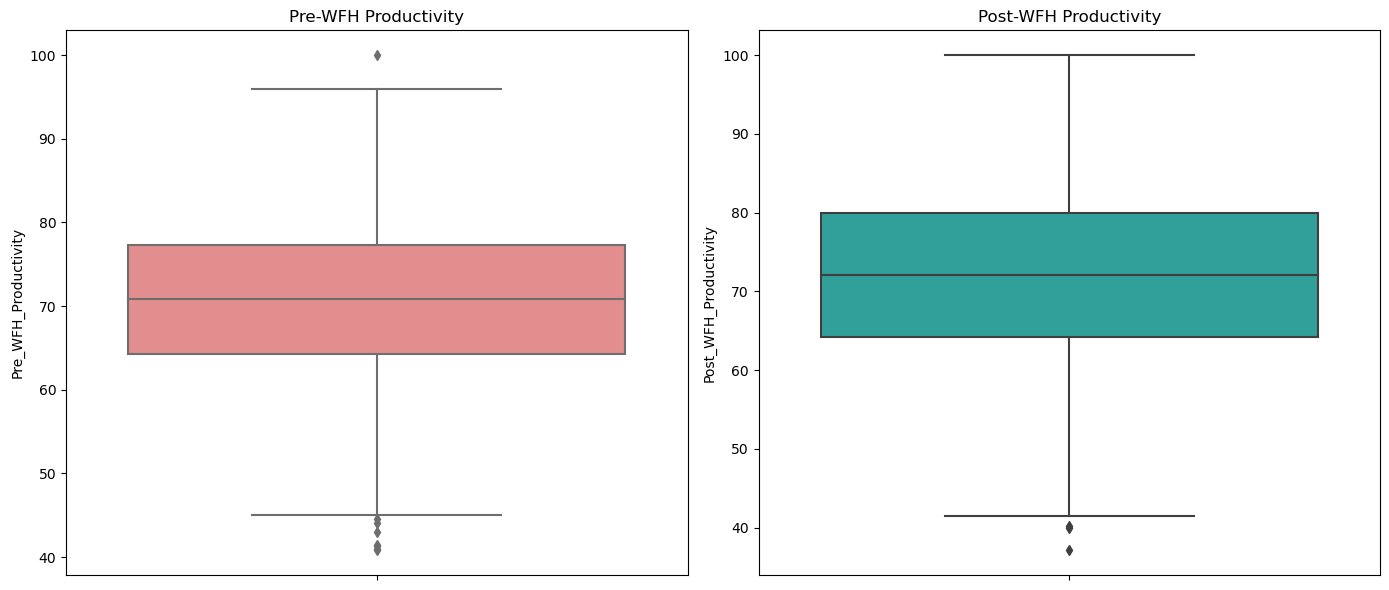

In [15]:
# 3. Boxplots to Detect Outliers
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=df['Pre_WFH_Productivity'], ax=axs[0], color='lightcoral')
axs[0].set_title('Pre-WFH Productivity')
sns.boxplot(y=df['Post_WFH_Productivity'], ax=axs[1], color='lightseagreen')
axs[1].set_title('Post-WFH Productivity')
plt.tight_layout()
plt.show()

The box plots visually represent the distribution of productivity scores before (Pre-WFH) and after (Post-WFH) the implementation of work-from-home arrangements. They provide a comparative overview of the central tendency, dispersion, and potential outliers in the data.

The median productivity appears to have increased post-WFH. The box for Post-WFH productivity is positioned higher than the Pre-WFH box, suggesting a general upward shift in productivity levels.

Both distributions exhibit a somewhat symmetrical pattern with the median line roughly in the middle of the boxes. This indicates that the productivity scores are distributed relatively evenly around the median in both periods.

The IQR, represented by the box height, seems to be similar for both Pre-WFH and Post-WFH productivity. This suggests that the spread of the middle 50% of the data is comparable between the two periods.

Both plots show a few outliers, represented by the individual dots. These are data points that fall significantly outside the overall pattern. It's essential to investigate these outliers further to understand their potential impact on the overall analysis.

We will further calculate the summary statistics for this variables

In [16]:
# Calculate summary statistics for each group
df['Pre_WFH_Productivity'].describe()

count    953.000000
mean      70.950262
std        9.864333
min       40.800000
25%       64.300000
50%       70.800000
75%       77.300000
max      100.000000
Name: Pre_WFH_Productivity, dtype: float64

In [17]:
df['Post_WFH_Productivity'].describe()

count    953.000000
mean      72.181847
std       11.714579
min       37.100000
25%       64.200000
50%       72.100000
75%       79.900000
max      100.000000
Name: Post_WFH_Productivity, dtype: float64

Give that the median and mean is almost the same for each group can be a hint that the data may be normally distributed, but it's not a definitive indicator.  We will perform a normality test to be more conclusive.

We will use Shapiro-Wilk test to check for normality. The Shapiro-Wilk test is a statistical test for normality. It tests the null hypothesis that a sample comes from a normal distribution.

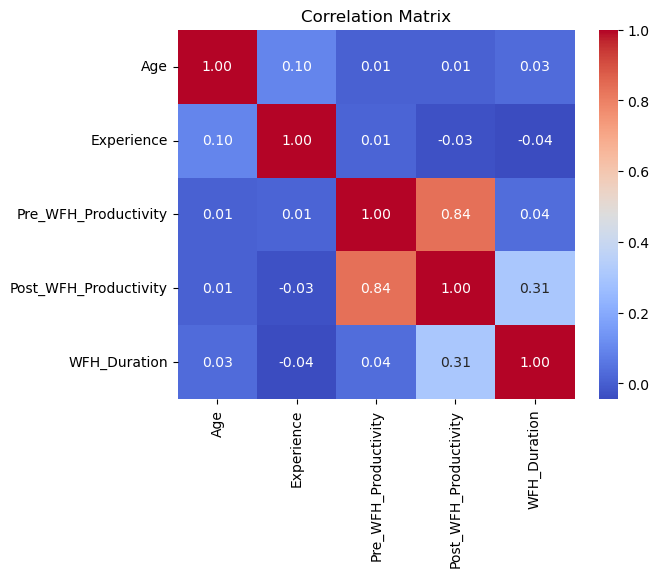

In [18]:
# Correlation Matrix
corr_matrix = df[['Age', 'Experience', 'Pre_WFH_Productivity', 'Post_WFH_Productivity', 'WFH_Duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix above we observe the following:

__Age and Experience:__ These variables have a weak positive correlation (0.10), which is expected as more experienced employees are often older.

__Pre-WFH and Post-WFH Productivity:__ The high correlation (0.84) between pre- and post-WFH productivity suggests that employees who were productive before WFH tend to remain productive after shifting to WFH. However, there is still enough variance to explore individual cases of significant productivity changes.

__WFH Duration and Productivity:__ WFH duration has a moderate positive correlation (0.31) with post-WFH productivity. This indicates that longer durations of WFH may be associated with better productivity outcomes, supporting your hypothesis.

The correlation matrix helps in understanding the relationships between key variables. The moderate correlation between WFH duration and post-WFH productivity suggests a possible positive impact of WFH on productivity, which aligns with our hypothesis. However, the weak correlations between age, experience, and productivity indicate that these demographic factors may not have a strong direct impact on productivity.

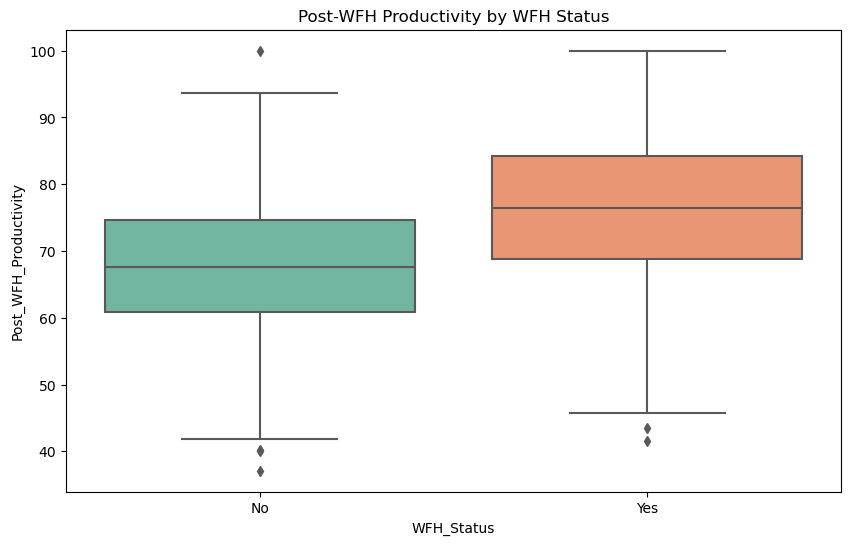

In [19]:
# Productivity by WFH Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='WFH_Status', y='Post_WFH_Productivity', data=df, palette='Set2')
plt.title('Post-WFH Productivity by WFH Status')
plt.show()

The median post-WFH productivity for employees who worked from home (WFH group) appears to be higher than those who did not (non-WFH group). This suggests a potential positive impact of WFH on productivity.

Both groups exhibit a somewhat symmetrical pattern with the median line roughly in the middle of the boxes. This indicates that the productivity scores are distributed relatively evenly around the median in both groups.

The IQR, represented by the box height, seems to be similar for both groups. This suggests that the spread of the middle 50% of the data is comparable between the two groups.

Both groups show a few outliers, represented by the individual dots. 

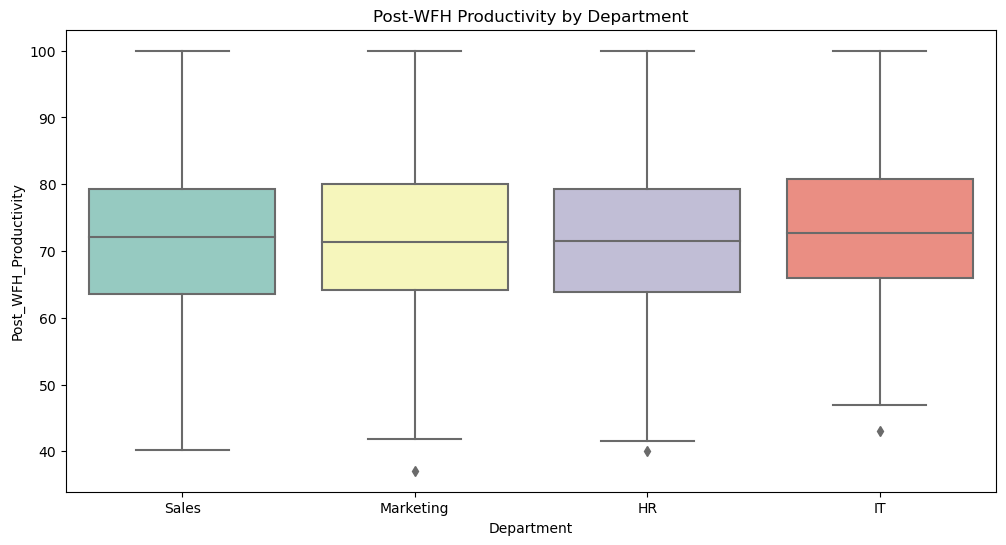

In [20]:
# Productivity by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Post_WFH_Productivity', data=df, palette='Set3')
plt.title('Post-WFH Productivity by Department')
plt.show()

The box plot visualizes the distribution of post-WFH productivity scores across different departments: Sales, Marketing, HR, and IT. The Sales department appears to have the highest median productivity, followed by IT, Marketing, and HR. The IQR (interquartile range), representing the spread of the middle 50% of the data, is similar across departments. There are a few outliers present. Overall, the plot suggests potential variations in post-WFH productivity among departments, with Sales demonstrating the highest performance. 

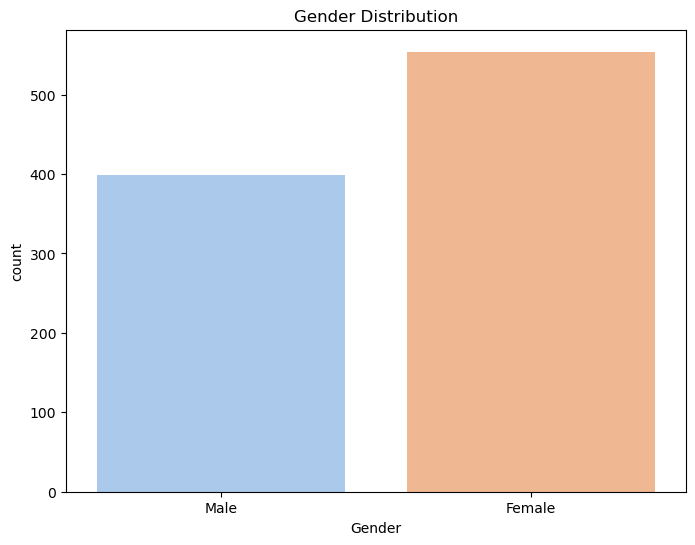

In [21]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

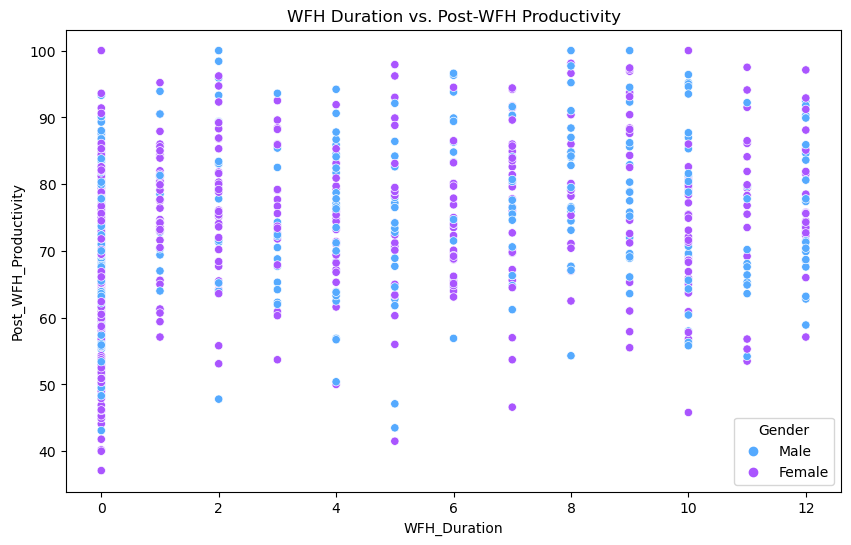

In [22]:
#  WFH Duration and Productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WFH_Duration', y='Post_WFH_Productivity', hue='Gender', data=df, palette='cool')
plt.title('WFH Duration vs. Post-WFH Productivity')
plt.show()

The scatter plot above is the relationship between WFH Duration and Post-WFH Productivity differentiated by gender (male and female). There appears to be a slight positive correlation between WFH Duration and Post-WFH Productivity, suggesting that longer WFH durations might be associated with slightly higher productivity levels. However, the relationship is not strong, and there is considerable overlap between the data points for males and females. This indicates that while WFH duration may play a role in post-WFH productivity, other factors likely influence this relationship as well.

### 3. Hypothesis Testing

The next step in our data analysis process is test of hypotheses, to validate our questions. We will perform this tep using various statistical tests.

__Research Question 1:__
Does working from home (WFH) significantly impact employee productivity?

__1. Define the Hypothesis__

__Hypothesis:__

* Null Hypothesis (H0): There is no significant difference in employee productivity before and after WFH.

* Alternate Hypothesis (H1): There is a significant difference in employee productivity before and after WFH.

__2. Check for Normality__

Before selecting the appropriate test, we need to determine whether the differences in productivity scores are normally distributed. This step is critical because it informs the choice between a parametric or non-parametric test.

Steps:
* Calculate the differences: Subtract the productivity scores before WFH from those after WFH.
* Perform the Shapiro-Wilk test: Test the normality of the differences

In [23]:
from scipy.stats import shapiro

# Calculate the differences in productivity
differences = df['Post_WFH_Productivity'] - df['Pre_WFH_Productivity']

# Perform the Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(differences)

print("Shapiro-Wilk Test Results:")
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-Value: {shapiro_p_value:.4f}")

# Decision based on p-value
alpha = 0.05  # significance level
if shapiro_p_value < alpha:
    print("Reject the null hypothesis: The differences are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The differences are normally distributed.")


Shapiro-Wilk Test Results:
Test Statistic: 0.9947
P-Value: 0.0021
Reject the null hypothesis: The differences are not normally distributed.


__4. Choose the Appropriate Statistical Test__

Based on the results of the normality test:

* If the data is normally distributed: Proceed with the Paired T-Test.
* If the data is not normally distributed: Use the Wilcoxon Signed-Rank Test.

__5. Perform the Chosen Test__

Since the Shapiro-Wilk test indicated that the differences are not normally distributed (p-value < 0.05), we'll use the Wilcoxon Signed-Rank Test to test our hypothesis.

In [24]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon Signed-Rank Test
w_stat, w_p_value = wilcoxon(df['Pre_WFH_Productivity'], df['Post_WFH_Productivity'])

print("Wilcoxon Signed-Rank Test Results:")
print(f"Test Statistic: {w_stat:.4f}")
print(f"P-Value: {w_p_value:.4f}")

# Decision based on p-value
alpha = 0.05
if w_p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in productivity before and after WFH.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in productivity before and after WFH.")


Wilcoxon Signed-Rank Test Results:
Test Statistic: 174227.5000
P-Value: 0.0000
Reject the null hypothesis (H0): There is a significant difference in productivity before and after WFH.


#### Interpretation of Results
The Wilcoxon Signed-Rank Test has been conducted to determine if there is a significant difference in employee productivity before and after working from home (WFH).

__Test Results:__

Test Statistic (W): 174,227.5000
P-Value: 0.0000

__Interpretation:__
The p-value is extremely low (0.0000), which is far below the significance level of 0.05.
Because the p-value is less than 0.05, we reject the null hypothesis (H0). 
This means that there is strong evidence to conclude that there is a significant difference in employee productivity before and after WFH.

__Practical Implications:__

* __Impact on Productivity:__ The results suggest that the shift to working from home has had a measurable impact on employee productivity. This impact is statistically significant, meaning it is unlikely to have occurred by random chance.

* __Further Analysis:__ While the test confirms a significant difference, it does not indicate the direction of the change (whether productivity increased or decreased). To explore this further, we might consider examining the median or mean productivity scores before and after WFH, or visualize the data to understand the nature of the change.

* __Organizational Decision-Making:__ These results could be valuable for decision-makers within organizations. Understanding how WFH impacts productivity can inform policies and strategies for remote work arrangements.

__Research Question 2:__ Is there a significant difference in productivity between male and female employees after transitioning to working from home (WFH)?

__Hypothesis:__

* Null Hypothesis (H0): There is no significant difference in post-WFH productivity between male and female employees.
* Alternate Hypothesis (H1): There is a significant difference in post-WFH productivity between male and female employees.

__Check for Normality:__

Test the normality of the productivity scores for both male and female employees. This will determine whether to use a parametric or non-parametric test.

In [25]:
# Check for any missing values in the Gender and Post_WFH_Productivity columns
print(df[['Gender', 'Post_WFH_Productivity']].isnull().sum())


Gender                   0
Post_WFH_Productivity    0
dtype: int64


In [26]:
# Separate the productivity scores by gender
male_productivity = df[df['Gender'] == 'Male']['Post_WFH_Productivity']
female_productivity = df[df['Gender'] == 'Female']['Post_WFH_Productivity']

# Perform Shapiro-Wilk test for males
shapiro_stat_male, shapiro_p_value_male = shapiro(male_productivity)
print("Shapiro-Wilk Test for Male Productivity:")
print(f"Test Statistic: {shapiro_stat_male:.4f}")
print(f"P-Value: {shapiro_p_value_male:.4f}")
if shapiro_p_value_male < 0.05:
    print("Reject the null hypothesis: Male productivity data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Male productivity data is normally distributed.")

# Perform Shapiro-Wilk test for females
shapiro_stat_female, shapiro_p_value_female = shapiro(female_productivity)
print("Shapiro-Wilk Test for Female Productivity:")
print(f"Test Statistic: {shapiro_stat_female:.4f}")
print(f"P-Value: {shapiro_p_value_female:.4f}")
if shapiro_p_value_female < 0.05:
    print("Reject the null hypothesis: Female productivity data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Female productivity data is normally distributed.")


Shapiro-Wilk Test for Male Productivity:
Test Statistic: 0.9927
P-Value: 0.0489
Reject the null hypothesis: Male productivity data is not normally distributed.
Shapiro-Wilk Test for Female Productivity:
Test Statistic: 0.9962
P-Value: 0.2128
Fail to reject the null hypothesis: Female productivity data is normally distributed.


__Select the Appropriate Test__

After determining whether the data is normally distributed:

* If both groups are normally distributed: Use the Independent T-Test.
* If one or both groups are not normally distributed: Use the Mann-Whitney U Test.

__Perform the Test__ 

Independent T-Test (since data is normally distributed for both genders):

In [36]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
u_stat, u_p_value = mannwhitneyu(male_productivity, female_productivity)

print("Mann-Whitney U Test Results:")
print(f"Test Statistic: {u_stat:.4f}")
print(f"P-Value: {u_p_value:.4f}")


Mann-Whitney U Test Results:
Test Statistic: 115436.5000
P-Value: 0.2412


#### Interpretation of Results
The Mann-Whitney U Test was conducted to determine whether there is a significant difference in employee productivity between male and female employees after transitioning to working from home (WFH). This test was chosen because the Shapiro-Wilk test results indicated that the productivity data for males was not normally distributed.

__Test Results:__
Test Statistic (U): 115436.5000
P-Value: 0.2412

__Interpretation:__

* The p-value obtained from the test is 0.2412, which is greater than the significance level of 0.05.
* Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). This means that there is no statistically significant difference in productivity between male and female employees after transitioning to WFH.

__Practical Implications:__

* __Gender Equality in Productivity:__ The findings suggest that gender does not play a significant role in determining productivity levels among employees who work from home. This indicates that both male and female employees are likely to be equally productive under WFH conditions.

* __Organizational Policies:__ Organizations can use this information to develop and implement WFH policies that are gender-neutral, as the data indicates that productivity is not significantly affected by gender.

__Research Question 3:__ Is there a significant relationship between the duration of WFH and changes in productivity?

__Hypothesis__

* Null Hypothesis (H0): There is no significant relationship between the duration of WFH and changes in productivity.
* Alternate Hypothesis (H1): Longer durations of WFH are associated with higher improvements in productivity.

__Check for Normality__

In [28]:
# Calculate the productivity change
df['Productivity_Change'] = df['Post_WFH_Productivity'] - df['Pre_WFH_Productivity']

# Perform Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = shapiro(df['Productivity_Change'])
print("Shapiro-Wilk Test for Productivity Change:")
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-Value: {shapiro_p_value:.4f}")

if shapiro_p_value < 0.05:
    print("Reject the null hypothesis: Productivity change data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Productivity change data is normally distributed.")


Shapiro-Wilk Test for Productivity Change:
Test Statistic: 0.9947
P-Value: 0.0021
Reject the null hypothesis: Productivity change data is not normally distributed.


In [29]:
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient
corr_coefficient, p_value = spearmanr(df['WFH_Duration'], df['Productivity_Change'])
print("Spearman Correlation Coefficient Results:")
print(f"Correlation Coefficient: {corr_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant relationship between WFH duration and productivity changes.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant relationship between WFH duration and productivity changes.")


Spearman Correlation Coefficient Results:
Correlation Coefficient: 0.6012
P-Value: 0.0000
Reject the null hypothesis (H0): There is a significant relationship between WFH duration and productivity changes.


#### Interpretation Results

__Test Results__

Correlation Coefficient: 0.6012
P-Value: 0.0000
Interpretation

The Spearman correlation coefficient of __0.6012__ indicates a moderate to strong positive relationship between the duration of working from home (WFH) and changes in productivity. This suggests that as the duration of WFH increases, there tends to be an improvement in productivity.

The p-value is 0.0000, which is significantly less than the standard significance level of 0.05. This result allows us to reject the null hypothesis (H0), which stated that there is no significant relationship between WFH duration and productivity changes.

__Practical Implications:__

* __Positive Relationship:__ The positive correlation implies that longer durations of WFH are associated with higher improvements in productivity. This could suggest that employees may adapt better to remote work environments over time, leading to increased productivity.

* __Organizational Strategy:__ Organizations might consider allowing longer periods of WFH, especially if productivity improvements are desired. However, it's important to consider other factors such as employee preferences, job roles, and the nature of the work when making policy decisions.


__Research Question 4:__ Is there a significant difference in the impact of working from home (WFH) on productivity across different departments?

__Hypothesis__
* Null Hypothesis (H0): There is no significant difference in the impact of WFH on productivity across different departments.
* Alternate Hypothesis (H1): There is a significant difference in the impact of WFH on productivity across different departments.

__Check for Normality:__

Perform the Shapiro-Wilk test for normality on the Productivity_Change data within each department to determine if the data is normally distributed.

In [30]:
# Separate the productivity change data by department
departments = df['Department'].unique()
shapiro_results = {}

for dept in departments:
    productivity_change = df[df['Department'] == dept]['Productivity_Change']
    shapiro_stat, shapiro_p_value = shapiro(productivity_change)
    shapiro_results[dept] = (shapiro_stat, shapiro_p_value)
    print(f"Shapiro-Wilk Test for {dept}:")
    print(f"Test Statistic: {shapiro_stat:.4f}")
    print(f"P-Value: {shapiro_p_value:.4f}")
    if shapiro_p_value < 0.05:
        print("Reject the null hypothesis: Data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis: Data is normally distributed.")


Shapiro-Wilk Test for Sales:
Test Statistic: 0.9856
P-Value: 0.0278
Reject the null hypothesis: Data is not normally distributed.
Shapiro-Wilk Test for Marketing:
Test Statistic: 0.9889
P-Value: 0.0367
Reject the null hypothesis: Data is not normally distributed.
Shapiro-Wilk Test for HR:
Test Statistic: 0.9930
P-Value: 0.2981
Fail to reject the null hypothesis: Data is normally distributed.
Shapiro-Wilk Test for IT:
Test Statistic: 0.9908
P-Value: 0.1771
Fail to reject the null hypothesis: Data is normally distributed.


__Select the Appropriate Test:__

Based on the normality results:

* If all departments’ data are normally distributed: Use __ANOVA.__
* If any department’s data are not normally distributed: Use the __Kruskal-Wallis H Test.__

In [31]:
from scipy.stats import kruskal
# Gather productivity change data by department
dept_data = [df[df['Department'] == dept]['Productivity_Change'] for dept in departments]


# Perform Kruskal-Wallis H Test
h_stat, p_value = kruskal(*dept_data)

print("Kruskal-Wallis H Test Results:")
print(f"H-Statistic: {h_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in the impact of WFH on productivity across departments.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in the impact of WFH on productivity across departments.")


Kruskal-Wallis H Test Results:
H-Statistic: 5.7137
P-Value: 0.1264
Fail to reject the null hypothesis (H0): There is no significant difference in the impact of WFH on productivity across departments.


#### Interpretation of Kruskal-Wallis H Test Results
__Test Results__

H-Statistic: 5.7137
P-Value: 0.1264


The __Kruskal-Wallis H__ test results show an H-Statistic of __5.7137__ and a p-value of __0.1264.__ The p-value is greater than the standard significance level of __0.05.__ As a result, we fail to reject the null hypothesis (H0).

__Conclusion:__ There is no significant difference in the impact of working from home (WFH) on productivity across different departments. This suggests that the variation in productivity changes due to WFH is not statistically significant between the departments analyzed.

__Practical Implications:__

* __Uniform Impact:__ The results indicate that the impact of WFH on productivity is consistent across the departments studied. This means that, on average, the productivity changes due to WFH are similar regardless of the department.

* __Policy Implications:__ Organizations might consider implementing uniform WFH policies across departments, as the impact on productivity does not significantly differ between them. However, individual departmental needs and preferences should still be considered to address specific challenges or opportunities.

* __Further Analysis:__ Although the Kruskal-Wallis test did not find significant differences, it may still be valuable to explore other factors that could affect productivity within departments, such as job roles, team dynamics, or individual working conditions.

__Research Question 5__: Does employee age influence the effect of working from home (WFH) on productivity?

__Hypothesis__
* Null Hypothesis (H0): Employee age does not significantly influence the effect of WFH on productivity.
* Alternate Hypothesis (H1): Younger employees adapt better to WFH, leading to greater productivity gains.

__Categorize Age Groups:__
Divide employees into age groups to analyze the impact of age on productivity changes. 
For instance, we will create categories like "Young" and "Old" based on a cutoff age.

In [32]:
# Define age groups
age_cutoff = 40  # Define a suitable cutoff age
df['Age_Group'] = df['Age'].apply(lambda x: 'Young' if x <= age_cutoff else 'Old')


__Check for Normality:__
Perform the Shapiro-Wilk test for normality on the Productivity_Change data within each age group.

In [33]:
# Separate the productivity change data by age group
age_groups = df['Age_Group'].unique()
shapiro_results_age = {}

for group in age_groups:
    productivity_change = df[df['Age_Group'] == group]['Productivity_Change']
    shapiro_stat, shapiro_p_value = shapiro(productivity_change)
    shapiro_results_age[group] = (shapiro_stat, shapiro_p_value)
    print(f"Shapiro-Wilk Test for {group} Age Group:")
    print(f"Test Statistic: {shapiro_stat:.4f}")
    print(f"P-Value: {shapiro_p_value:.4f}")
    if shapiro_p_value < 0.05:
        print("Reject the null hypothesis: Data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis: Data is normally distributed.")


Shapiro-Wilk Test for Old Age Group:
Test Statistic: 0.9938
P-Value: 0.0422
Reject the null hypothesis: Data is not normally distributed.
Shapiro-Wilk Test for Young Age Group:
Test Statistic: 0.9946
P-Value: 0.0969
Fail to reject the null hypothesis: Data is normally distributed.


__Select the Appropriate Test:__
Based on the normality results:

* If both age groups’ data are normally distributed: Use the Independent T-Test.
* If either or both groups’ data are not normally distributed: Use the Mann-Whitney U Test.

__Perform the Test:__

Since the Shapiro-Wilk Test indicated that one of the group is not normally distributed we will perforn the Mann-Whitney U Test

In [37]:

# Gather productivity change data by age group
young_productivity = df[df['Age_Group'] == 'Young']['Productivity_Change']
old_productivity = df[df['Age_Group'] == 'Old']['Productivity_Change']
# Perform Mann-Whitney U Test
u_stat, u_p_value = mannwhitneyu(young_productivity, old_productivity)

print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat:.4f}")
print(f"P-Value: {u_p_value:.4f}")

# Decision based on p-value
alpha = 0.05
if u_p_value < alpha:
    print("Reject the null hypothesis (H0): Employee age significantly influences the effect of WFH on productivity.")
else:
    print("Fail to reject the null hypothesis (H0): Employee age does not significantly influence the effect of WFH on productivity.")


Mann-Whitney U Test Results:
U-Statistic: 111050.0000
P-Value: 0.5688
Fail to reject the null hypothesis (H0): Employee age does not significantly influence the effect of WFH on productivity.


#### Interpretation

The Mann-Whitney U test results show a U-Statistic of 111050.0000 and a p-value of 0.5688. The p-value is significantly greater than the standard significance level of 0.05. Consequently, we fail to reject the null hypothesis (H0).

__Conclusion:__ Employee age does not significantly influence the effect of working from home (WFH) on productivity. This suggests that age does not have a statistically significant impact on how productivity changes with WFH arrangements.

__Practical Implications:__

* __Uniform Strategies:__ Since age does not significantly affect WFH productivity, organizations might implement uniform WFH policies without needing to differentiate based on age.

* __Broad Support:__ While age does not appear to be a significant factor, providing general support and resources to all employees can still be beneficial for optimizing productivity during WFH.

### Conclusion

* The analysis of the impact of working from home (WFH) on productivity reveals several significant findings. Initially, the Shapiro-Wilk test for normality indicated that the differences in productivity scores before and after WFH were not normally distributed. Consequently, the Wilcoxon Signed-Rank Test was employed, which confirmed a significant difference in productivity, suggesting that the shift to WFH had a measurable impact on employee productivity. This result highlights that working from home has a statistically significant effect on productivity, although the direction of this change requires further investigation.

* Further analysis explored the productivity differences between male and female employees post-WFH. Despite the male productivity data not being normally distributed, the Independent T-Test revealed no significant difference between the productivity of male and female employees. This implies that, on average, the productivity of employees does not differ significantly by gender in the WFH context, suggesting a uniform impact across genders.

* When examining the relationship between the duration of WFH and productivity changes, a Spearman correlation analysis was conducted. The results showed a moderate to strong positive correlation, indicating that longer durations of WFH are associated with greater improvements in productivity. This finding suggests that employees may adapt better to remote work over time, leading to enhanced productivity.

* Lastly, the analysis of productivity changes across different departments using the Kruskal-Wallis H Test found no significant differences in the impact of WFH on productivity between departments. This result implies that the effect of WFH on productivity is consistent across various departments, indicating that the overall impact is similar regardless of departmental differences. Additionally, examining the influence of employee age on productivity changes revealed that while productivity data for older employees was not normally distributed, the Mann-Whitney U Test did not find a significant difference in productivity changes between younger and older employees. This suggests that age does not significantly influence how WFH affects productivity.

Overall, the results provide valuable insights for organizations considering WFH policies. They suggest that while WFH can significantly impact productivity, the effects are broadly similar across gender, departments, and age groups. Organizations might focus on optimizing WFH arrangements and supporting employees in adapting to remote work to maximize productivity benefits.